In [2]:
import numpy as np

def pca(X, num_components):

    X_standardized = (X - np.mean(X, axis=0))/np.std(X, axis=0)

    covariance_matrix = np.cov(X_standardized.T)

    eigenvalues , eigenvectors = np.linalg.eig(covariance_matrix)

    eigenvectors = eigenvectors[:, eigenvalues.argsort()[::-1]]

    components = eigenvectors[:, :num_components]

    X_transformed = np.dot(X_standardized, components)

    return X_transformed

X_example = np.array(([1,2,3], [4,5,6], [7,8,9], [10,11,12]))

num_components = 2
X_pca = pca(X_example, num_components)

print(X_pca)

[[-2.32379001e+00  1.48851609e-16]
 [-7.74596669e-01  4.41975897e-17]
 [ 7.74596669e-01 -4.41975897e-17]
 [ 2.32379001e+00 -1.48851609e-16]]


In [18]:
X_example = np.random.rand(100,5)
y_example = np.random.randint(0,2,100)

<function matplotlib.pyplot.show(close=None, block=None)>

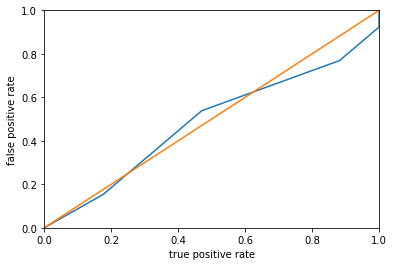

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_example = np.random.rand(100,5)
y_example = np.random.randint(0,2,100)


num_components = 2
X_pca = pca(X_example,num_components)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_example, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)

y_scores = knn_classifier.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure()
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('true positive rate')
plt.ylabel('false positive rate')
plt.show




In [19]:
import pandas as pd
import numpy as np

In [20]:
T,P,dens,G,A,U,H,S,Cp,Cv,ratio = np.loadtxt('superfluid data.txt', unpack = True)

In [21]:
# function to give values of feature with given pressure

def Pressure_finder(Matrix, Pressure):
    k=-1
    tmp=[]
    for i in range(0,len(T)):
        if P[i]==Pressure:
            k=k+1
            tmp.append(0)
    k=-1
    for i in range(0,len(T)):
        if P[i]==Pressure:
            k=k+1
            tmp[k]=Matrix[i]
    
    return tmp


In [22]:
T0=Pressure_finder(T,0); T25=Pressure_finder(T,2.5); T5=Pressure_finder(T,5); T75=Pressure_finder(T,7.5); T10=Pressure_finder(T,10); T125=Pressure_finder(T,12.5); T15=Pressure_finder(T,15); T175=Pressure_finder(T,17.5); T20=Pressure_finder(T,20); T225=Pressure_finder(T,22.5)

S0=Pressure_finder(S,0); S25=Pressure_finder(S,2.5); S5=Pressure_finder(S,5); S75=Pressure_finder(S,7.5); S10=Pressure_finder(S,10); S125=Pressure_finder(S,12.5); S15=Pressure_finder(S,15); S175=Pressure_finder(S,17.5); S20=Pressure_finder(S,20); S225=Pressure_finder(S,22.5)


In [27]:
S0

[6.8889e-06,
 2.3112e-05,
 5.4383e-05,
 0.00010534,
 0.00018041,
 0.00028386,
 0.00041983,
 0.00059254,
 0.00080709,
 0.0010714,
 0.0010517,
 0.0018226,
 0.0023865,
 0.0031649,
 0.0042735,
 0.0058517,
 0.00803,
 0.01123,
 0.015562,
 0.021457,
 0.029213,
 0.039275,
 0.051689,
 0.06691,
 0.085256,
 0.10675,
 0.13301,
 0.16481,
 0.20076,
 0.2402,
 0.28431,
 0.33558,
 0.39554,
 0.46502,
 0.54155,
 0.62676,
 0.72189,
 0.82613,
 0.95098,
 1.092,
 1.2394]

In [28]:
def RegX(X,Y):
    Y=np.log(Y)
    tmp = np.polyfit(X, Y, 15)
    return tmp

def Reg(X,Y,t):
    f=np.poly1d(RegX(X,Y))
    tmp=f(t)
    return np.exp(tmp)

In [29]:


def linear(p,X,Y):
    Z=np.polyfit(X,Y,1)
    f=np.poly1d(Z)
    tmp=f(p)
    return tmp


In [32]:
def S(T,P):
    if P<=2.5:
        X=(0,2.5)
        Y=(Reg(T0,S0,T),Reg(T25,S25,T))
        tmp=linear(P,X,Y)
    if P>2.5 and P<=5:
        X=(2.5,5)
        Y=(Reg(T25,S25,T),Reg(T5,S5,T))
        tmp=linear(P,X,Y)
    if P>5 and P<=7.5:
        X=(5,7.5)
        Y=(Reg(T5,S5,T),Reg(T75,S75,T))
        tmp=linear(P,X,Y)
    if P>7.5 and P<=10:
        X=(7.5,10)
        Y=(Reg(T75,S75,T),Reg(T10,S10,T))
        tmp=linear(P,X,Y)
    if P>10 and P<=12.5:
        X=(10,12.5)
        Y=(Reg(T10,S10,T),Reg(T125,S125,T))
        tmp=linear(P,X,Y)
    if P>12.5 and P<=15:
        X=(12.5,15)
        Y=(Reg(T125,S125,T),Reg(T15,S15,T))
        tmp=linear(P,X,Y)
    if P>15 and P<=17.5:
        X=(15,17.5)
        Y=(Reg(T15,S15,T),Reg(T175,S175,T))
        tmp=linear(P,X,Y)
    if P>17.5 and P<=20:
        X=(17.5,20)
        Y=(Reg(T175,S175,T),Reg(T20,S20,T))
        tmp=linear(P,X,Y)
    
    return tmp

In [33]:
S(0.8,2)

0.003967027292810848

Homework μέχρι Παρασκευή 8/12

Με βάση τον παραπάνω αλγόριθμο και τα αρχεία superfluid data και normal fluid data του github, να κατασκευάσετε όλες τις εξισώσεις των dens,G,A,U,H,S,Cp,Cv με βάση τα πειραματικά δεδομένα ξεχωριστά για το ρευστό και το υπερρευστό, και να δώσετε το σχετικό σφάλμα της κάθε εξίσωσης σε σχέση με τα δεδομένα από τα οποία κατασκευάστηκε.

G_superfluid(T,P), G_normal_fluid(T,P)  --> G(T,P) : συνεχής και παραγωγίσιμη

Bonus ερώτημα 1, να ενωθούν οι εξισώσεις του ρευστού και του υπερρευστού στη θερμοκρασία των 2.15Κ. 
Bonus ερώτημα 2, Να σχεδιαστεί το διάγραμμα θερμοκρασίας πίεσης στο οποίο να φαίνονται οι ισεντροπικές και οι ισενθαλπικές γραμμές